In [1]:
import pandas as pd

from pycaret.regression import *

In [2]:
df = pd.read_csv('autosprocess.csv')

In [3]:
df

,fueltype,aspiration,doors,body,drive,engineloc,wheelbase,length,width,height,...,fuelsystem,bore,stroke,compression,horsepower,rpm,citympg,highwaympg,make,lnprice
0,gas,std,two,convertible,rwd,front,-1.904096,-0.404203,-0.867745,-2.154399,...,mpfi,0.609487,-1.834429,-0.264706,0.445345,-0.244699,-0.879528,-0.748561,alfa-romero,9.510075
1,gas,std,two,convertible,rwd,front,-1.904096,-0.404203,-0.867745,-2.154399,...,mpfi,0.609487,-1.834429,-0.264706,0.445345,-0.244699,-0.879528,-0.748561,alfa-romero,9.711116
2,gas,std,two,hatchback,rwd,front,-0.762439,-0.185216,-0.077234,-0.625030,...,mpfi,-2.391231,0.764897,-0.264706,1.874806,-0.244699,-1.250080,-0.922227,alfa-romero,9.711116
3,gas,std,four,sedan,fwd,front,0.263117,0.307505,0.318022,0.182138,...,mpfi,-0.454059,0.534577,0.000885,0.146156,0.841465,-0.323700,-0.227563,audi,9.543235
4,gas,std,four,sedan,4wd,front,0.185717,0.307505,0.430952,0.182138,...,mpfi,-0.454059,0.534577,-0.530297,0.578318,0.841465,-1.435356,-1.616892,audi,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,gas,std,four,sedan,rwd,front,2.062678,1.420688,1.842579,0.691927,...,mpfi,1.786983,-0.287995,-0.131910,0.545075,0.624232,-0.508976,-0.574895,volvo,9.731809
170,gas,turbo,four,sedan,rwd,front,2.062678,1.420688,1.786114,0.691927,...,mpfi,1.786983,-0.287995,-0.344383,2.074266,0.406999,-1.250080,-1.095894,volvo,9.854560
171,gas,std,four,sedan,rwd,front,2.062678,1.420688,1.842579,0.691927,...,mpfi,1.027308,-1.209275,-0.317824,1.209941,0.841465,-1.435356,-1.443226,volvo,9.975110
172,diesel,turbo,four,sedan,rwd,front,2.062678,1.420688,1.842579,0.691927,...,idi,-1.137767,0.534577,3.453570,0.279129,-0.679164,0.046851,-0.748561,volvo,10.019936


In [4]:
df.shape

(174, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fueltype     174 non-null    object 
 1   aspiration   174 non-null    object 
 2   doors        174 non-null    object 
 3   body         174 non-null    object 
 4   drive        174 non-null    object 
 5   engineloc    174 non-null    object 
 6   wheelbase    174 non-null    float64
 7   length       174 non-null    float64
 8   width        174 non-null    float64
 9   height       174 non-null    float64
 10  weight       174 non-null    float64
 11  enginetype   174 non-null    object 
 12  cylinders    174 non-null    object 
 13  enginesize   174 non-null    float64
 14  fuelsystem   174 non-null    object 
 15  bore         174 non-null    float64
 16  stroke       174 non-null    float64
 17  compression  174 non-null    float64
 18  horsepower   174 non-null    float64
 19  rpm     

In [6]:
df.describe()

,wheelbase,length,width,height,weight,enginesize,bore,stroke,compression,horsepower,rpm,citympg,highwaympg,lnprice
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,174.000000
mean,1.051522e-14,6.398458e-15,4.930922e-15,-1.986023e-14,3.088207e-16,4.223952e-16,-4.568504e-15,2.066706e-14,2.729298e-16,4.900295e-16,-6.897420e-16,6.712383e-16,2.513953e-16,9.261290
std,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,0.402048
min,-2.291099e+00,-2.612320e+00,-2.166442e+00,-2.154399e+00,-1.556542e+00,-1.592959e+00,-2.923004e+00,-3.841504e+00,-7.958882e-01,-1.516008e+00,-2.091177e+00,-1.620632e+00,-1.964224e+00,8.540519
25%,-7.624393e-01,-6.323141e-01,-9.242099e-01,-7.949596e-01,-8.284755e-01,-8.750425e-01,-6.059939e-01,-4.113804e-01,-3.709423e-01,-9.176290e-01,-6.791643e-01,-8.795280e-01,-7.485612e-01,8.939702
50%,-2.786862e-01,-2.097575e-02,-1.336989e-01,9.717258e-02,-2.030855e-01,-3.734841e-01,-1.501887e-01,1.397426e-01,-2.647059e-01,-1.862770e-01,1.897665e-01,-4.578657e-02,-5.389640e-02,9.206282
75%,5.340189e-01,4.785880e-01,4.874169e-01,6.919274e-01,8.044225e-01,6.493017e-01,8.753730e-01,5.592542e-01,-1.584694e-01,5.450751e-01,8.414646e-01,7.879549e-01,8.144345e-01,9.628868
max,3.049535e+00,2.342258e+00,3.254206e+00,2.518674e+00,2.354480e+00,2.498184e+00,2.394724e+00,2.179720e+00,3.453570e+00,3.403997e+00,3.231024e+00,2.270162e+00,2.724763e+00,10.246226


### Setup the Experiment

In [7]:
exp = setup(data=df, target= 'lnprice', session_id=123, train_size=0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(174, 24)"
4,Missing Values,False
5,Numeric Features,13
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.102300,0.016800,0.126600,0.881000,0.012200,0.011000
1,Bayesian Ridge,0.105300,0.017600,0.130100,0.875800,0.012600,0.011300
2,CatBoost Regressor,0.116900,0.024000,0.150700,0.845400,0.014500,0.012500
3,Extra Trees Regressor,0.117200,0.025000,0.152900,0.834700,0.014700,0.012600
4,Extreme Gradient Boosting,0.119300,0.024200,0.152000,0.833900,0.014700,0.012800
5,Random Forest,0.122300,0.024600,0.153500,0.831200,0.014800,0.013100
6,Gradient Boosting Regressor,0.121900,0.025300,0.155100,0.825200,0.015000,0.013100
7,Support Vector Machine,0.129900,0.027100,0.161700,0.821600,0.015600,0.014000
8,Light Gradient Boosting Machine,0.125200,0.027300,0.160600,0.813400,0.015500,0.013400
9,AdaBoost Regressor,0.127000,0.026700,0.158700,0.813100,0.015300,0.013600


### Linear Regression Model

In [9]:
lrmodel = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1250,0.0240,0.1550,0.8324,0.0150,0.0136
1,0.1212,0.0194,0.1394,0.8799,0.0141,0.0136
2,0.1317,0.0260,0.1613,0.7911,0.0153,0.0139
3,0.0540,0.0052,0.0720,0.9772,0.0070,0.0058
4,0.1381,0.0514,0.2267,0.6742,0.0208,0.0146
5,0.1145,0.0345,0.1857,0.8529,0.0178,0.0123
6,0.0944,0.0135,0.1160,0.8277,0.0113,0.0102
7,0.1903,0.0652,0.2553,0.5083,0.0243,0.0201
8,0.1099,0.0322,0.1793,0.7333,0.0172,0.0116
9,0.1058,0.0158,0.1259,0.8993,0.0125,0.0116


In [10]:
print(lrmodel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


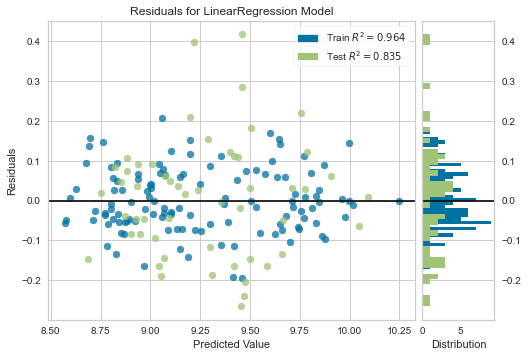

In [11]:
plot_model(lrmodel)

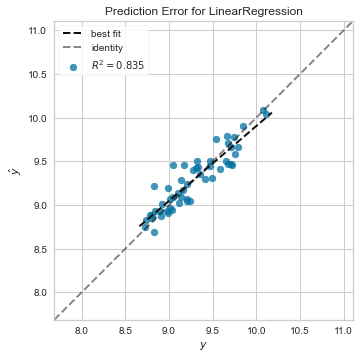

In [12]:
plot_model(lrmodel, plot = 'error')

In [13]:
evaluate_model(lrmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
predict_model(lrmodel)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1146,0.0213,0.1461,0.8351,0.0142,0.0124


,wheelbase,length,width,height,weight,enginesize,bore,stroke,compression,horsepower,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_toyota,make_volkswagen,make_volvo,lnprice,Label
0,0.127666,1.219950,0.487417,0.946822,0.634657,0.059233,0.875373,-0.551218,-0.185029,0.412102,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.649240,9.5024
1,0.379218,0.900594,0.713277,0.521997,0.179616,-0.412822,-0.454059,0.534577,-0.264706,-0.319250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.416541,9.2988
2,-0.239986,0.015522,-0.246629,0.352067,-0.378101,0.019895,0.077714,0.764897,-0.397501,-0.020061,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.099297,9.1358
3,-0.917240,-1.453515,-0.698350,-1.304749,-1.264848,-1.081567,-1.289702,-0.024772,-0.158469,-0.984116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.730529,8.7491
4,1.133873,1.420688,0.882672,1.541577,1.297384,0.845991,1.786983,-0.287995,-0.131910,0.545075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.712024,9.4719
5,0.379218,0.635985,0.713277,0.521997,0.408303,0.649302,-0.454059,0.534577,-0.397501,0.412102,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.495143,9.3093
6,1.172573,1.329443,0.487417,0.097173,1.551740,1.632749,-0.150189,0.370063,-0.211588,1.941293,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.664596,9.7858
7,-0.007785,0.271007,-0.020769,-0.794960,0.125944,1.042681,1.179243,0.863606,-0.185029,0.611562,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.041803,9.4593
8,0.862971,0.937092,1.164998,-0.794960,1.143370,2.026129,-0.150189,0.370063,-0.185029,2.107509,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.714625,9.6656
9,3.049535,2.342258,1.560253,2.051367,2.202799,1.278708,1.483113,0.929411,2.922388,-0.086547,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.536762,9.7570


### Predict Test Data

In [15]:
testdata = pd.read_csv("testregression.csv")

In [16]:
testdata

,fueltype,aspiration,doors,body,drive,engineloc,wheelbase,length,width,height,...,enginesize,fuelsystem,bore,stroke,compression,horsepower,rpm,citympg,highwaympg,make
0,gas,turbo,four,sedan,fwd,front,106,192.5,71.5,56,...,130,mpfi,3.15,3.4,8.5,140,5500,17,22,alfa-romero
1,diesel,turbo,four,sedan,fwd,front,106,192.5,71.5,56,...,130,mpfi,3.15,3.4,8.5,140,5500,17,22,alfa-romero


In [17]:
prediction = predict_model(estimator=lrmodel, data=testdata, round=2)

In [18]:
prediction

,fueltype,aspiration,doors,body,drive,engineloc,wheelbase,length,width,height,...,fuelsystem,bore,stroke,compression,horsepower,rpm,citympg,highwaympg,make,Label
0,gas,turbo,four,sedan,fwd,front,106,192.5,71.5,56,...,mpfi,3.15,3.4,8.5,140,5500,17,22,alfa-romero,529.97
1,diesel,turbo,four,sedan,fwd,front,106,192.5,71.5,56,...,mpfi,3.15,3.4,8.5,140,5500,17,22,alfa-romero,529.97
